In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

df = pd.read_csv('/kaggle/input/best-selling-game-consoles-of-all-time/best-selling game consoles.csv')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Análise das Vendas de Unidades por Empresa

Primeiro deve-se realizar uma análise descritiva das vendas de unidades por empresa, utilizando estatísticas descritivas como média, desvio padrão, mínimo, máximo e quartis. Os dados são agrupados pela coluna 'Company' e, em seguida, são calculadas as estatísticas para a coluna 'Units sold (million)'. Valores ausentes na coluna de desvio padrão ('std') são preenchidos com zero. Os resultados são ordenados em ordem decrescente com base na média de vendas, fornecendo uma visão geral das empresas com as maiores médias de vendas de unidades. Isso permite identificar as empresas mais bem-sucedidas em termos de vendas de unidades, bem como ter uma compreensão das variações nas vendas entre as empresas em geral, sem levar consideração o tempo em que foram feitas.

In [2]:
unidades_por_companias = df.groupby('Company')['Units sold (million)'].describe()
unidades_por_companias['std'] = unidades_por_companias['std'].fillna(0)
unidades_por_companias = unidades_por_companias.sort_values(by='mean', ascending = False)
unidades_por_companias

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Sony,7.0,84.155714,48.609859,15.00,56.000,87.40,109.845,155.00
Nintendo,17.0,51.947647,44.464679,3.00,13.560,44.06,75.940,154.02
Microsoft,4.0,46.250000,30.769303,18.50,22.625,41.25,64.875,84.00
Sega,7.0,11.200000,9.442360,2.24,6.265,9.26,11.810,30.75
NEC/Hudson Soft[note 6],1.0,10.000000,0.000000,10.00,10.000,10.00,10.000,10.00
Atari,4.0,8.250000,14.500000,1.00,1.000,1.00,8.250,30.00
Micro Genius,1.0,6.000000,0.000000,6.00,6.000,6.00,6.000,6.00
Tectoy,2.0,5.500000,3.535534,3.00,4.250,5.50,6.750,8.00
Bandai,1.0,3.500000,0.000000,3.50,3.500,3.50,3.500,3.50


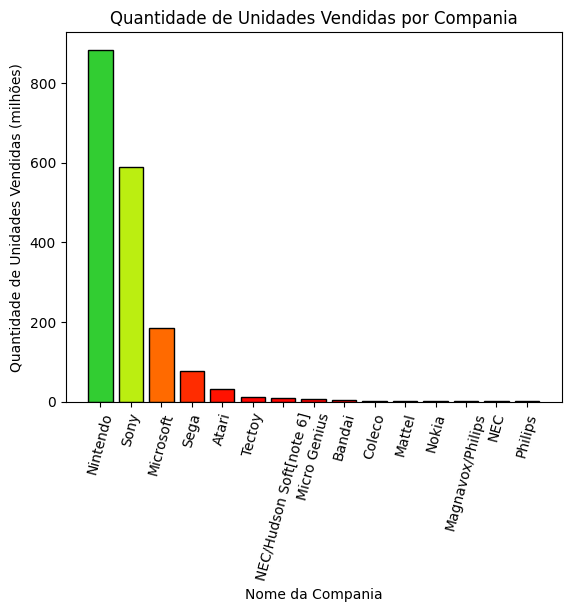

In [3]:
vendas_por_compania = df.groupby('Company')['Units sold (million)'].sum()
vendas_por_compania = vendas_por_compania.sort_values(ascending=False)
cores = ['red','yellow','limegreen']
normalizador = mcolors.Normalize(vmin=vendas_por_compania.min(), vmax=vendas_por_compania.max())
cmap = mcolors.LinearSegmentedColormap.from_list('verde_para_vermelho', cores)
mappable = plt.cm.ScalarMappable(norm=normalizador, cmap=cmap)
plt.bar(vendas_por_compania.index, vendas_por_compania.values, edgecolor='black', color=mappable.to_rgba(vendas_por_compania.values))
plt.xlabel('Nome da Compania')
plt.ylabel('Quantidade de Unidades Vendidas (milhões)')
plt.title('Quantidade de Unidades Vendidas por Compania')
plt.xticks(rotation=75)
plt.show()

# Quantidade de Unidades Vendidas por Tipo de Console

Este gráfico de barras apresenta a quantidade de unidades vendidas, em milhões, por tipo de console. Os tipos de console foram ordenados em ordem decrescente com base na quantidade de unidades vendidas. O gráfico mostra que o tipo de console "Home" lidera em termos de vendas, seguido por "Handheld" e "Hybrid". O tipo de console "home console add-on" possui a menor quantidade de unidades vendidas. Essa visualização permite comparar e identificar os tipos de console mais populares e sua contribuição relativa para as vendas gerais de unidades.

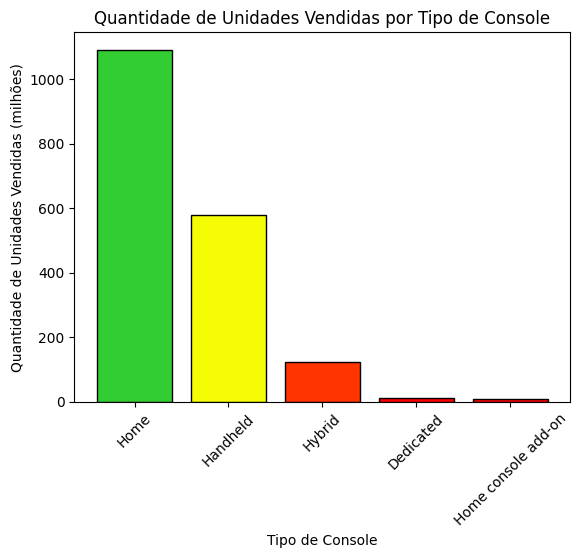

In [4]:
vendas_por_tipo = df.groupby('Type')['Units sold (million)'].sum()
vendas_por_tipo = vendas_por_tipo.sort_values(ascending = False)
normalizador = mcolors.Normalize(vmin=vendas_por_tipo.min(),vmax=vendas_por_tipo.max())
mappable = plt.cm.ScalarMappable(norm=normalizador, cmap=cmap)
cores = ['limegreen','yellow','red']
plt.bar(vendas_por_tipo.index, vendas_por_tipo.values, edgecolor='black', color=mappable.to_rgba(vendas_por_tipo.values))
plt.xlabel('Tipo de Console')
plt.ylabel('Quantidade de Unidades Vendidas (milhões)')
plt.title('Quantidade de Unidades Vendidas por Tipo de Console')
plt.xticks(rotation=45)
plt.show()

In [5]:
# Add a new decade column
df['decada'] = df['Released Year'].apply(lambda x: x - x % 10)
df.head()

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks,decada
0,PlayStation 2,Home,Sony,2000,2013,155.00,Final sales are greater than 155 million,2000
1,Nintendo DS,Handheld,Nintendo,2004,2013,154.02,NaN,2000
2,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55,NaN,2010
3,Game Boy,Handheld,Nintendo,1989,2003,64.42,The Game Boy (1989) and the Game Boy Color (19...,1980
4,Game Boy Color,Handheld,Nintendo,1998,2003,44.06,NaN,1990


# Quantidade de Unidades Vendidas por Console

Este gráfico evidencia que as empresas Sony e Nintendo dominam o mercado de consoles, ocupando as cinco primeiras posições em vendas. Surpreendentemente, a Microsoft, com seu console de maior sucesso, o Xbox 360, aparece apenas em oitavo lugar. Isso destaca a forte competição entre as empresas e a preferência dos consumidores pelos produtos da Sony e Nintendo.

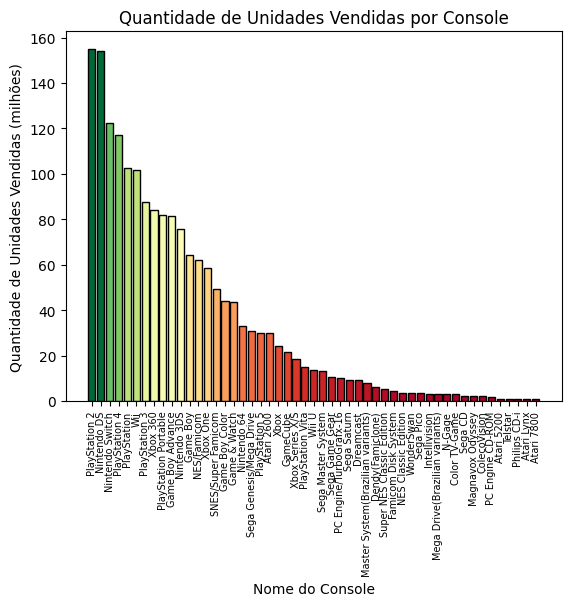

In [6]:
vendas_por_nome = df.groupby('Console Name')['Units sold (million)'].sum()
vendas_por_nome = vendas_por_nome.sort_values(ascending=False)
normalizador = mcolors.Normalize(vmin=vendas_por_nome.min(), vmax=vendas_por_nome.max())
cmap = plt.cm.get_cmap('RdYlGn')
cores = [cmap(normalizador(valor)) for valor in vendas_por_nome.values]
plt.bar(vendas_por_nome.index, vendas_por_nome.values, edgecolor='black', color=cores)
plt.xlabel('Nome do Console')
plt.ylabel('Quantidade de Unidades Vendidas (milhões)')
plt.title('Quantidade de Unidades Vendidas por Console')
plt.xticks(rotation=90, fontsize=7)
plt.show()


In [7]:
df.columns

Index(['Console Name', 'Type', 'Company', 'Released Year',
       'Discontinuation Year', 'Units sold (million)', 'Remarks', 'decada'],
      dtype='object')

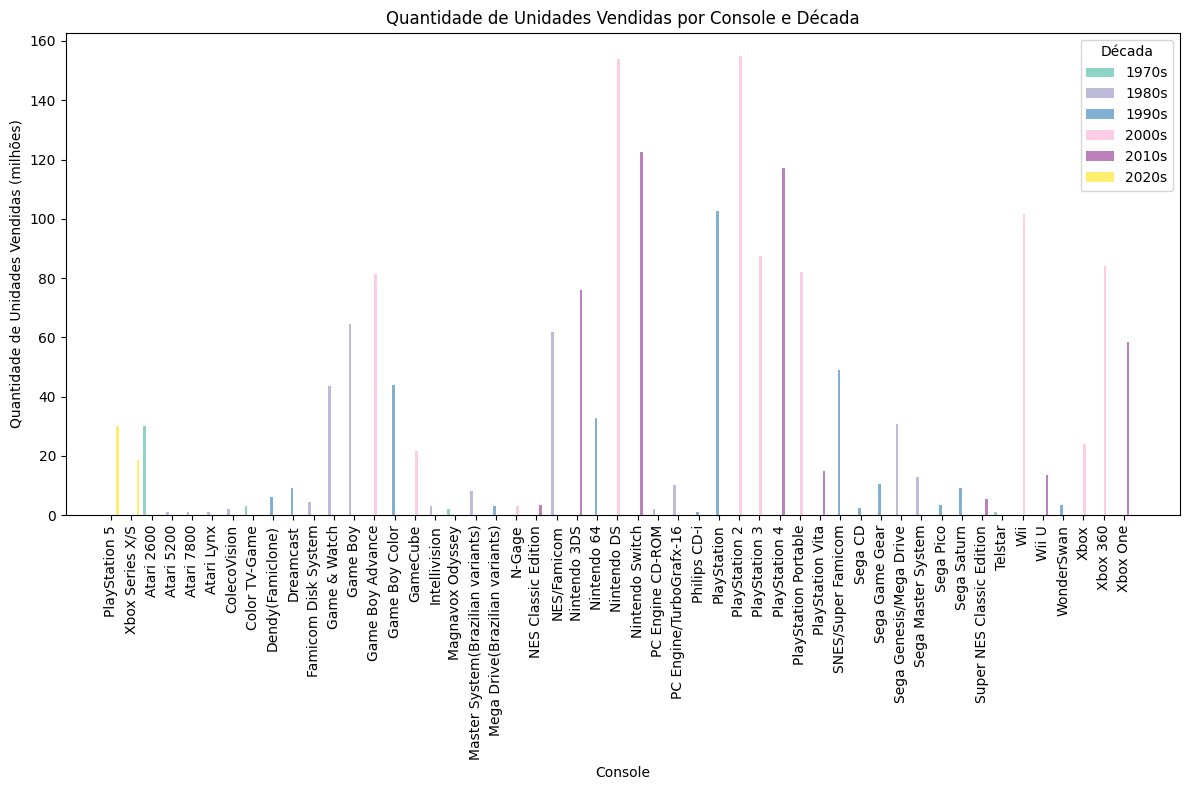

In [8]:
# Configurar o tamanho da figura
plt.figure(figsize=(12, 8))

# Agrupar por console e década e calcular a soma das unidades vendidas
vendas_por_console_decada = df.groupby(['Console Name', 'decada'])['Units sold (million)'].sum().unstack()

# Ordenar as colunas pela ordem das décadas
vendas_por_console_decada = vendas_por_console_decada.reindex(columns=sorted(vendas_por_console_decada.columns))

# Ordenar as linhas pela coluna 'Units sold (million)'
vendas_por_console_decada = vendas_por_console_decada.sort_values(by=vendas_por_console_decada.columns[-1], ascending=False)

# Obter a lista de consoles e décadas
consoles = vendas_por_console_decada.index
decadas = vendas_por_console_decada.columns

# Configurar as cores para cada barra
cores = plt.cm.get_cmap('Set3', len(decadas))

# Criar as barras agrupadas por console e década
largura_barra = 0.8 / len(decadas)
for i, decada in enumerate(decadas):
    valores = vendas_por_console_decada[decada]
    plt.bar(np.arange(len(consoles)) + (largura_barra * i), valores, width=largura_barra, color=cores(i), label=str(decada) + 's')

# Configurar os eixos e a legenda
plt.xlabel('Console')
plt.ylabel('Quantidade de Unidades Vendidas (milhões)')
plt.title('Quantidade de Unidades Vendidas por Console e Década')
plt.xticks(np.arange(len(consoles)) + (largura_barra * (len(decadas) - 1)) / 2, consoles, rotation=90)
plt.legend(title='Década')

# Exibir o gráfico
plt.tight_layout()
plt.show()


# Conclusão

Para um lançamento de um novo console, de acordo com os dados apresentados, é indicado que o console seja do tipo "Home". Além disso, para lançamentos de jogos para consoles, a estratégia mais promissora seria focar no Playstation da Sony. Embora a Nintendo possua mais vendas totais, é importante observar que a maioria das vendas está relacionada aos consoles portáteis, os quais foram amplamente substituídos por smartphones. Por outro lado, a Sony possui um grande volume de vendas atualmente com seus consoles mais recentes. Portanto, considerando o cenário atual, a Sony se mostra como uma opção mais favorável para lançamentos de jogos.